In [47]:
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]

c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]


In [48]:
y = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

In [49]:
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [50]:
import numpy as np
import matplotlib.pyplot as plt

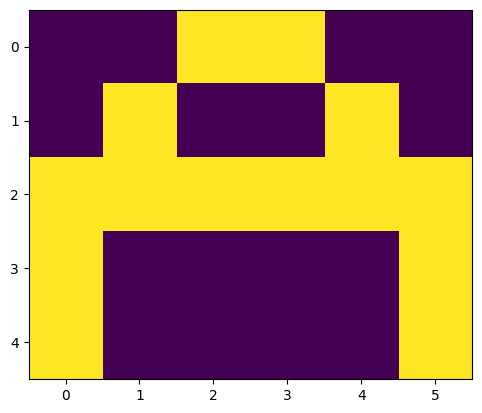

In [51]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [53]:
def f_forward(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

In [54]:
def generate_wt(x, y):
    return np.random.randn(x, y)

In [55]:
def loss(out, y):
    s = np.square(out - y)
    s = np.sum(s) / len(y)
    return s

In [56]:
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    d2 = (a2 - y)
    d1 = np.multiply(w2.dot(d2.transpose()).transpose(), (np.multiply(a1, 1 - a1)))
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)
    return w1, w2

In [57]:
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_val = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_val.append(sum(l) / len(x))
        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
    return acc, loss_val, w1, w2

In [58]:
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if maxm < out[0][i]:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [59]:
w1 = generate_wt(30, 4)
w2 = generate_wt(4, 3)
print(w1, "\n\n", w2)

[[-1.41373652 -0.99451197 -0.51343336  0.01341659]
 [-0.37749291  0.45453195  1.26185527 -0.7858485 ]
 [-1.25467945  0.21758061  0.0814641  -0.08091791]
 [ 0.22920718 -0.55128509 -1.40406684 -0.83033477]
 [ 0.40911338 -0.11209749 -0.78257949  1.62421013]
 [ 1.08875885  0.69436076  2.19527456 -1.70498957]
 [-1.25130143 -1.22101304  1.72951371 -2.106458  ]
 [-0.30244238 -0.56222582 -1.21878185  0.38412538]
 [ 1.84827677  0.98125846 -0.12409071 -1.27994987]
 [ 1.24775425  1.88569295  0.93725247 -0.26302097]
 [ 0.25252307  1.12635143 -0.56371779  0.30671172]
 [ 0.11740798  1.18865493 -1.61341934  1.02071183]
 [-0.42970366  1.47500412 -0.29498988 -1.05770366]
 [-0.58517807 -0.55632026  0.99733891  0.0551128 ]
 [ 0.15699446  0.61949791 -0.99757145  2.50467592]
 [ 0.87897004  1.04226917 -1.3059516  -0.94100123]
 [ 1.17809833  1.28690548 -0.17654494 -1.24599398]
 [-1.89190754 -0.29238295  2.04544347 -1.33931857]
 [ 0.0538863  -0.196152    0.71787421  0.29501909]
 [ 0.23654026 -0.2705256   0.73

In [60]:
acc, loss_val, w1, w2 = train(x, y, w1, w2, 0.1, 100)

Epochs: 1 acc: 79.5496073085248
Epochs: 2 acc: 80.1813243274463
Epochs: 3 acc: 80.79842159962713
Epochs: 4 acc: 81.41131342349934
Epochs: 5 acc: 82.0188296812192
Epochs: 6 acc: 82.60898418065202
Epochs: 7 acc: 83.16594289435996
Epochs: 8 acc: 83.67910068482273
Epochs: 9 acc: 84.14679755173964
Epochs: 10 acc: 84.57366695143975
Epochs: 11 acc: 84.96647253736117
Epochs: 12 acc: 85.3316424519253
Epochs: 13 acc: 85.67450808487919
Epochs: 14 acc: 85.9993408286147
Epochs: 15 acc: 86.30959567387676
Epochs: 16 acc: 86.60813615245941
Epochs: 17 acc: 86.8973909918415
Epochs: 18 acc: 87.17945051338481
Epochs: 19 acc: 87.45612172301455
Epochs: 20 acc: 87.72895816528174
Epochs: 21 acc: 87.99927552692354
Epochs: 22 acc: 88.26815989325311
Epochs: 23 acc: 88.53647291717036
Epochs: 24 acc: 88.80485663299534
Epochs: 25 acc: 89.07373980237952
Epochs: 26 acc: 89.34334716161399
Epochs: 27 acc: 89.61371251078664
Epochs: 28 acc: 89.88469612088224
Epochs: 29 acc: 90.15600640605072
Epochs: 30 acc: 90.4272252566

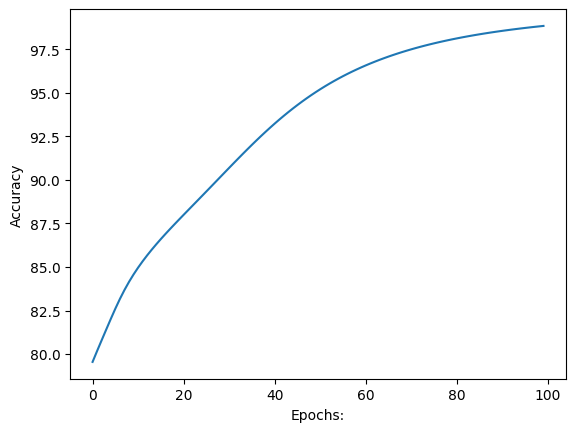

In [61]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs:")
plt.show()

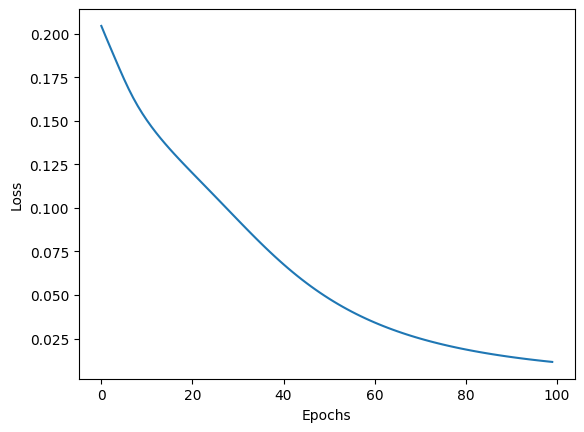

In [65]:
plt1 = plt.plot(loss_val)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [66]:
print(w1, "\n", w2)

[[-1.41373652 -0.99451197 -0.51343336  0.01341659]
 [-0.03233302  0.11526677  1.45184623 -0.81874121]
 [-1.13342594  0.00815057  0.74510845 -0.06724989]
 [ 0.35046069 -0.76071513 -0.7404225  -0.81666675]
 [ 0.75427327 -0.45136267 -0.59258853  1.59131742]
 [ 1.08875885  0.69436076  2.19527456 -1.70498957]
 [-1.25130143 -1.22101304  1.72951371 -2.106458  ]
 [-0.18118887 -0.77165587 -0.5551375   0.3977934 ]
 [ 1.84827677  0.98125846 -0.12409071 -1.27994987]
 [ 1.24775425  1.88569295  0.93725247 -0.26302097]
 [ 0.2160967   1.33985467 -0.75925027  0.9056847 ]
 [ 0.11740798  1.18865493 -1.61341934  1.02071183]
 [-0.65361004  1.60483926  0.17866351 -1.01114293]
 [-0.46392456 -0.7657503   1.66098326  0.06878082]
 [ 0.1205681   0.83300115 -1.19310393  3.1036489 ]
 [ 0.84254367  1.25577241 -1.50148408 -0.34202825]
 [ 1.14167197  1.50040872 -0.37207742 -0.647021  ]
 [-2.11581392 -0.16254781  2.51909686 -1.29275784]
 [-0.17002008 -0.06631686  1.1915276   0.34157983]
 [ 0.58170015 -0.60979078  0.92

C


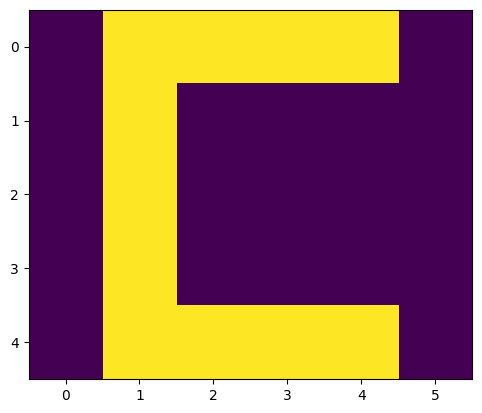

In [67]:
predict(x[2], w1, w2)